 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Creating a function to print the code I will be using to clean the data

x = ""
def clean_data(x):
    return f'''{x}_df = pd.read_csv(
        {x}_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
{x}_df = {x}_df.sort_index()'''


print(clean_data("whale"))



whale_df = pd.read_csv(
        whale_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_df = whale_df.sort_index()


In [3]:
# Reading whale returns


whale_csv = Path('C:/Users/Myles/Desktop/Github/RUT-VIRT-FIN-PT-05-2021-U-LOL/02-Homework/04-Pandas/Starter_Code/Resources/whale_returns.csv')
whale_df = pd.read_csv(
        whale_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_df = whale_df.sort_index()
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_df = whale_df.dropna()
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [6]:
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [7]:
# Print data cleaning code
print(clean_data("algo"))

algo_df = pd.read_csv(
        algo_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_df = algo_df.sort_index()


In [8]:
# Reading algorithmic returns
algo_csv = Path('C:/Users/Myles/Desktop/Github/RUT-VIRT-FIN-PT-05-2021-U-LOL/02-Homework/04-Pandas/Starter_Code/Resources/algo_returns.csv')
algo_df = pd.read_csv(algo_csv)
algo_df = pd.read_csv(
        algo_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_df = algo_df.sort_index()
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [9]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [10]:
# Drop nulls
algo_df = algo_df.dropna()
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [11]:
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [12]:
# Print data cleaning code
print(clean_data("sp500"))

sp500_df = pd.read_csv(
        sp500_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_df = sp500_df.sort_index()


In [13]:
# Reading S&P 500 Closing Prices
sp500_csv = Path('C:/Users/Myles/Desktop/Github/RUT-VIRT-FIN-PT-05-2021-U-LOL/02-Homework/04-Pandas/Starter_Code/Resources/sp500_history.csv')
sp500_df = pd.read_csv(
        sp500_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_df = sp500_df.sort_index()
sp500_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [14]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [15]:
# Fix Data Types
sp500_df["Close"] = sp500_df["Close"].str.replace("$", "")
sp500_df["Close"] = sp500_df["Close"].str.replace(",", "")
sp500_df["Close"] = sp500_df["Close"].astype("float")

sp500_df.dtypes

<ipython-input-15-650e040ba2d1>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp500_df["Close"] = sp500_df["Close"].str.replace("$", "")


Close    float64
dtype: object

In [16]:
# Calculate Daily Returns
sp500_returns = sp500_df.pct_change()
sp500_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [17]:
# Drop nulls
sp500_returns = sp500_returns.dropna()
sp500_returns.isnull().sum()

Close    0
dtype: int64

In [18]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns = sp500_returns.rename(columns={"Close": "S&P 500"})
sp500_returns.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [19]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_portfolio = pd.concat([whale_df, algo_df, sp500_returns], axis="columns", join="inner")
combined_portfolio.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Cumulative Returns'}, xlabel='Date'>

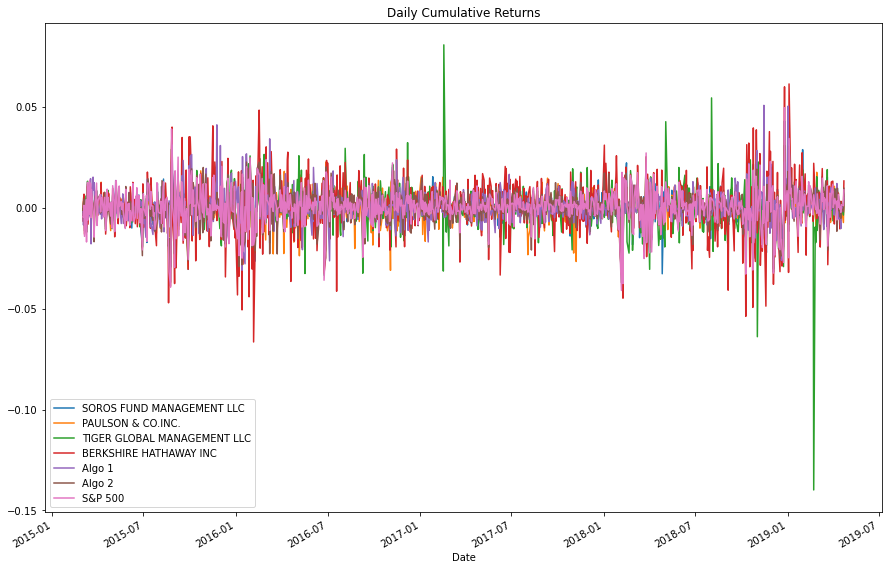

In [20]:
# Plot daily returns of all portfolios
combined_portfolio.plot(figsize=(15,10), title = "Daily Cumulative Returns")

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Daily Cumulative Returns'}, xlabel='Date'>

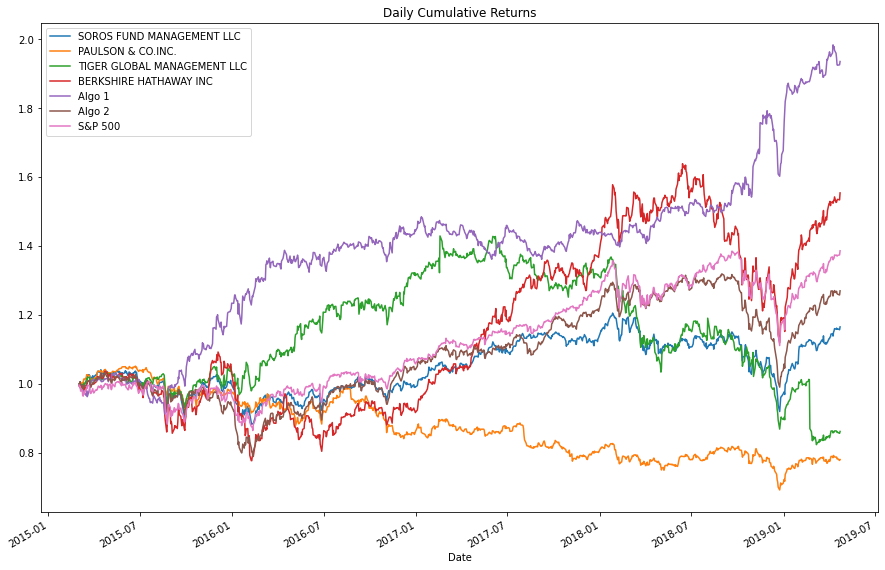

In [21]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1+ combined_portfolio).cumprod(axis=0)

# Plot cumulative returns
cumulative_returns.plot(figsize=(15,10), title = "Daily Cumulative Returns")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Risk Analysis'}>

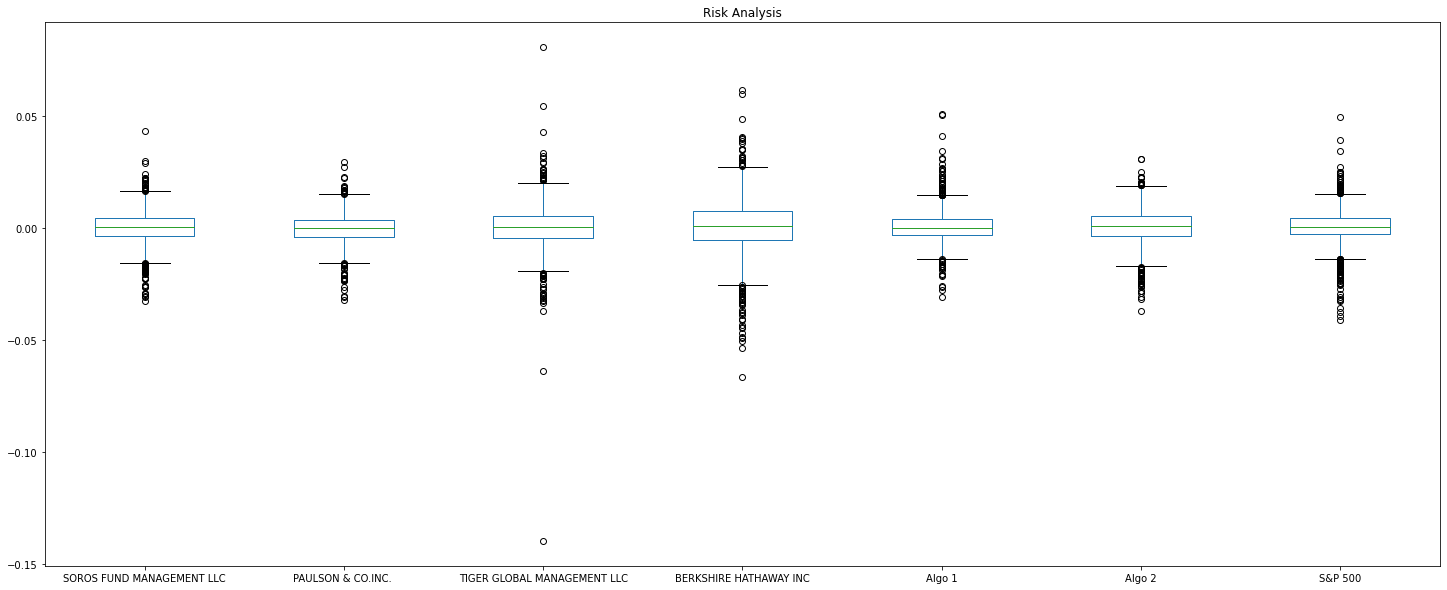

In [22]:
# Box plot to visually show risk
combined_portfolio.plot.box(figsize=(25,10), title = "Risk Analysis")

### Calculate Standard Deviations

In [23]:
# Calculate the daily standard deviations of all portfolios
combined_portfolio.std()

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [24]:
# Calculate  the daily standard deviation of S&P 500
sp500_std = combined_portfolio["S&P 500"].std()

# Determine which portfolios are riskier than the S&P 500
combined_portfolio.std() > sp500_std

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool

### Calculate the Annualized Standard Deviation

In [25]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = combined_portfolio.std() * np.sqrt(252)

annualized_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'21 Day Rolling Std Deviation'}, xlabel='Date'>

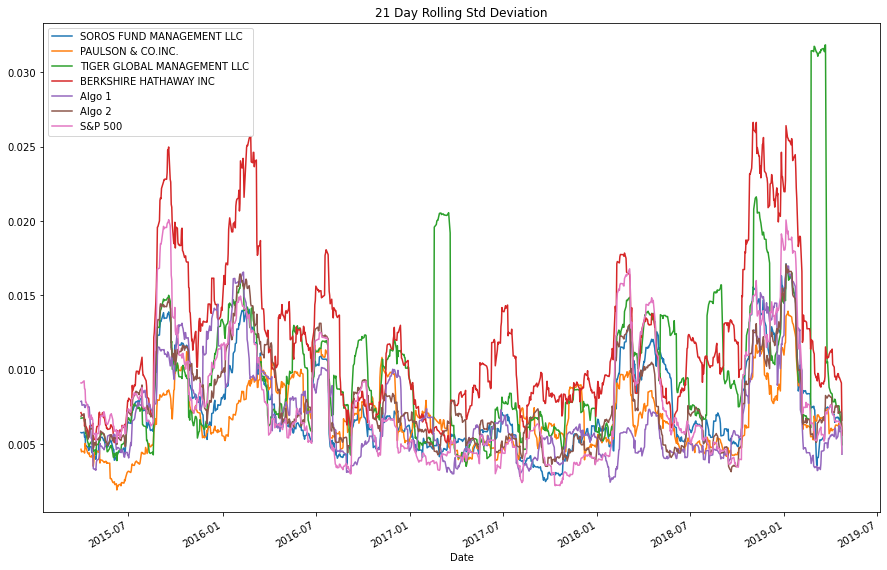

In [26]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_std21 = combined_portfolio.rolling(window=21).std()
# Plot the rolling standard deviation
combined_std21.plot(figsize=(15, 10), title="21 Day Rolling Std Deviation")

### Calculate and plot the correlation

In [27]:
# Calculate the correlation
correlation_df = combined_portfolio.corr()

# Display de correlation matrix
correlation_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Soros Fund Management LLC Beta'}, xlabel='Date'>

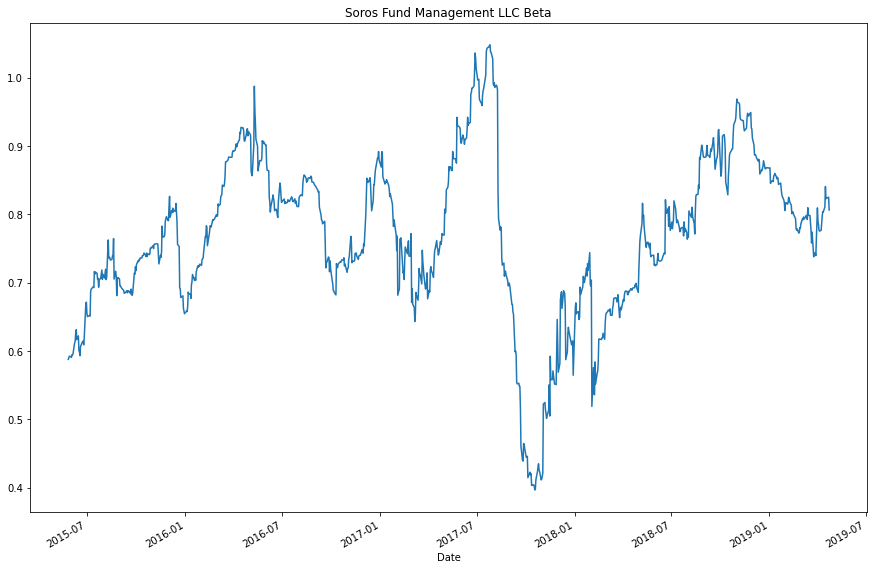

In [28]:
# Calculate covariance of a single portfolio
sfm_cov60 = combined_portfolio["SOROS FUND MANAGEMENT LLC"].rolling(window=60).cov(combined_portfolio["S&P 500"])

# Calculate variance of S&P 500
sp500_var60 = combined_portfolio["S&P 500"].rolling(window=60).var()

# Computing beta
beta = sfm_cov60/sp500_var60

# Plot beta trend
beta.plot(figsize=(15,10), title="Soros Fund Management LLC Beta")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:title={'center':'Exponentially Weighted Average'}, xlabel='Date'>

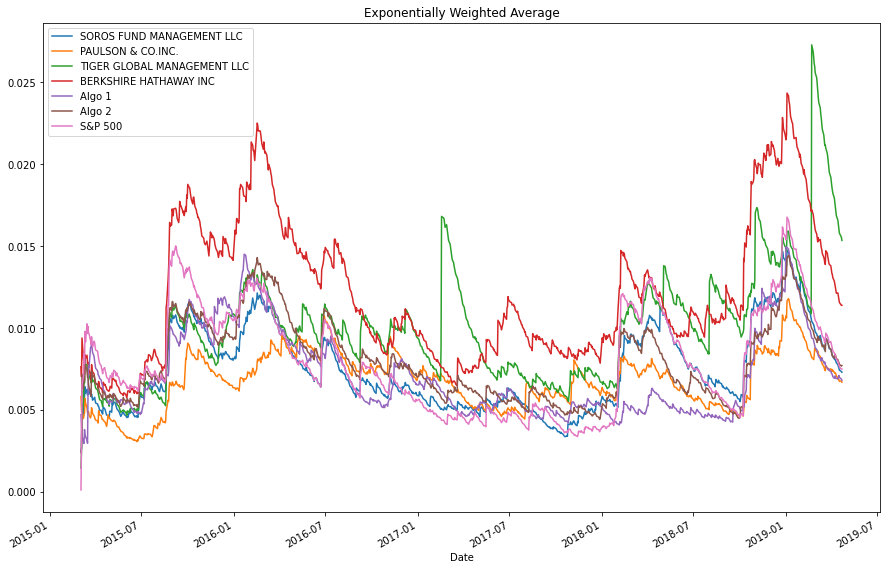

In [29]:
# Use `ewm` to calculate the rolling window
combined_portfolio_ewm = combined_portfolio.ewm(halflife=21)

combined_portfolio_ewm.std().plot(figsize=(15,10), title="Exponentially Weighted Average")

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [30]:
# Annualized Sharpe Ratios

combined_sharpe_ratios = (combined_portfolio.mean() * 252) / (combined_portfolio.std() * np.sqrt(252))

combined_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

<AxesSubplot:title={'center':'Combined Sharpe Ratios'}>

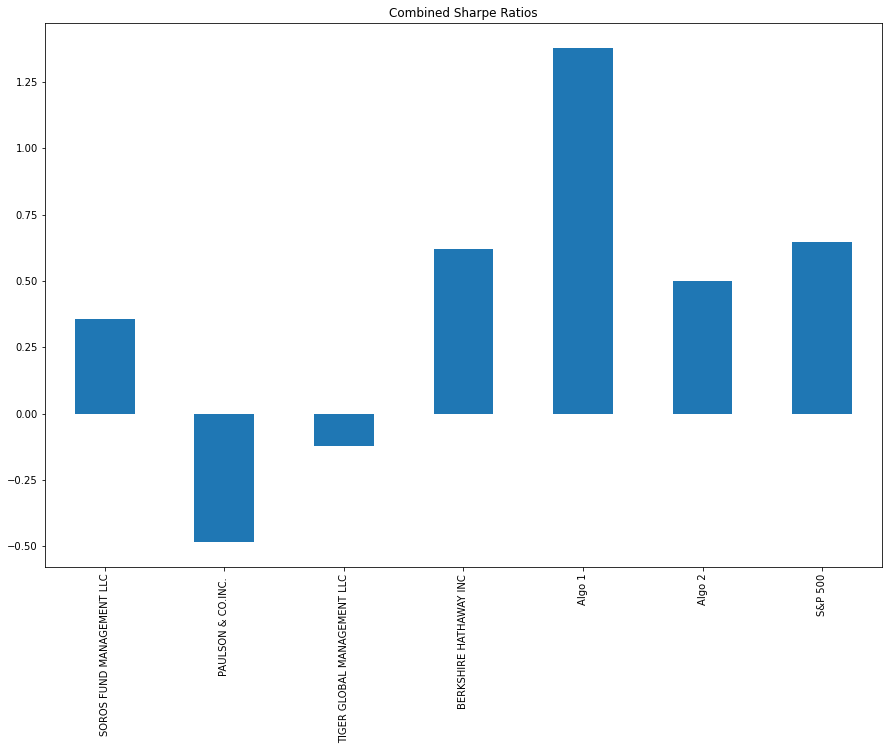

In [31]:
# Visualize the sharpe ratios as a bar plot
combined_sharpe_ratios.plot(figsize=(15,10), kind="bar", title="Combined Sharpe Ratios")

In [32]:
#Find the cumulative total return on the last date available
cumulative_returns.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2019-04-16,1.160965,0.786811,0.862080,1.526861,1.944990,1.267768,1.372945
2019-04-17,1.157602,0.781723,0.858279,1.531781,1.924954,1.261140,1.369823
2019-04-18,1.159278,0.782678,0.858778,1.534716,1.923823,1.259590,1.371986
2019-04-22,1.156280,0.776939,0.855652,1.533046,1.925124,1.257151,1.373375
2019-04-23,1.164568,0.779646,0.861189,1.553401,1.934691,1.269247,1.385517


In [33]:
#Print the cumulative total returns for each investment as of the last date available
total_returns = cumulative_returns.loc["2019-04-23",:]

print(total_returns)

SOROS FUND MANAGEMENT LLC      1.164568
PAULSON & CO.INC.              0.779646
TIGER GLOBAL MANAGEMENT LLC    0.861189
BERKSHIRE HATHAWAY INC         1.553401
Algo 1                         1.934691
Algo 2                         1.269247
S&P 500                        1.385517
Name: 2019-04-23 00:00:00, dtype: float64


### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.



#### Algo 1 out performed both the market and the whales portfolios while Algo 2 only outperformed three of the whale portfolios - Soros Fund Management LLC, Paulson & Co. Inc., and Berkshaire Hathaway. This is evidenced in the table above as Algo 1 had the highest total return amount on the last day of record - 4/23/2019 - while Algo 2 fell behind the portfolios mentioned above. Additionally, Algo 1 had the highest sharpe ratio - meaning it provided the most return for the risk it presented. Aglo 2 was behind the same funds that outperformed it on total return.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [34]:
# Reading data from 1st stock
aapl_csv = Path('C:/Users/Myles/Desktop/Github/RUT-VIRT-FIN-PT-05-2021-U-LOL/02-Homework/04-Pandas/Starter_Code/Resources/aapl_historical.csv')
aapl_df = pd.read_csv(
        aapl_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
appl_df = aapl_df.sort_index()
aapl_df.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [35]:
# Reading data from 2nd stock
cost_csv = Path('C:/Users/Myles/Desktop/Github/RUT-VIRT-FIN-PT-05-2021-U-LOL/02-Homework/04-Pandas/Starter_Code/Resources/cost_historical.csv')
cost_df = pd.read_csv(
        cost_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
cost_df = cost_df.sort_index()
cost_df.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,COST,195.76
2018-05-14,COST,195.88
2018-05-15,COST,195.48
2018-05-16,COST,198.71
2018-05-17,COST,199.60


In [36]:
# Reading data from 3rd stock
goog_csv = Path('C:/Users/Myles/Desktop/Github/RUT-VIRT-FIN-PT-05-2021-U-LOL/02-Homework/04-Pandas/Starter_Code/Resources/goog_historical.csv')
goog_df = pd.read_csv(
        goog_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
goog_df = goog_df.sort_index()
goog_df.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59


In [37]:
# Combine all stocks in a single DataFrame
combined_df = pd.concat([aapl_df, cost_df, goog_df], axis="rows", join="inner")
combined_df.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [38]:
# Reset Date index
combined_df = combined_df.reset_index()

combined_df.head()

,Trade DATE,Symbol,NOCP
0,2019-05-09,AAPL,200.72
1,2019-05-08,AAPL,202.90
2,2019-05-07,AAPL,202.86
3,2019-05-06,AAPL,208.48
4,2019-05-03,AAPL,211.75


In [39]:
# Reorganize portfolio data by having a column per symbol
pivot_df = combined_df.pivot_table(values="NOCP",index="Trade DATE",columns="Symbol")
pivot_df.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [40]:
# Calculate daily returns
daily_returns = pivot_df.pct_change()

# Drop NAs
daily_returns = daily_returns.dropna()

# Display sample data
daily_returns.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [41]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = daily_returns.dot(weights)

# Display sample data
portfolio_returns.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [42]:
# Join your returns DataFrame to the original returns DataFrame
combined_portfolio["Personal Returns"] = portfolio_returns
combined_portfolio.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Personal Returns
Date,,,,,,,,
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.009292
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.001545
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,0.001217
2019-04-23,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841,0.011959


In [43]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_portfolio.isnull().sum()

SOROS FUND MANAGEMENT LLC        0
PAULSON & CO.INC.                0
TIGER GLOBAL MANAGEMENT LLC      0
BERKSHIRE HATHAWAY INC           0
Algo 1                           0
Algo 2                           0
S&P 500                          0
Personal Returns               806
dtype: int64

In [44]:
combined_portfolio.dropna(inplace=True)

combined_portfolio.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P 500                        0
Personal Returns               0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [45]:
# Calculate the annualized `std`
annualized_std = combined_portfolio.std() * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
Algo 1                         0.133704
Algo 2                         0.139556
S&P 500                        0.152054
Personal Returns               0.211496
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'21 Day Rolling Std Deviation'}, xlabel='Date'>

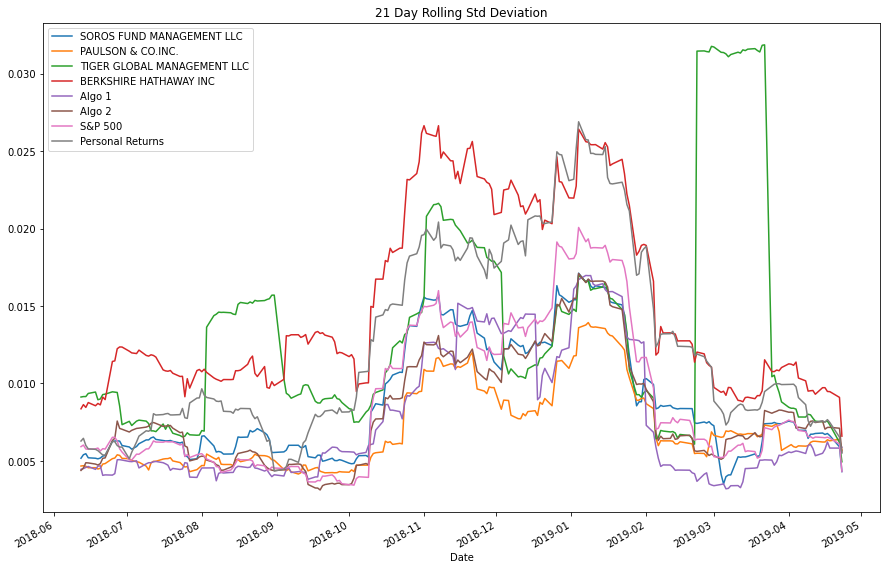

In [46]:
# Calculate rolling standard deviation
rolling_std21 = combined_portfolio.rolling(window=21).std()

# Plot rolling standard deviation
rolling_std21.plot(figsize=(15,10), title="21 Day Rolling Std Deviation")

### Calculate and plot the correlation

In [47]:
# Calculate and plot the correlation
correlation_df = combined_portfolio.corr()
correlation_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Personal Returns
SOROS FUND MANAGEMENT LLC,1.000000,0.791962,0.478627,0.816675,0.337826,0.862846,0.876981,0.733250
PAULSON & CO.INC.,0.791962,1.000000,0.485375,0.650758,0.361301,0.783656,0.766680,0.644210
TIGER GLOBAL MANAGEMENT LLC,0.478627,0.485375,1.000000,0.325457,0.114554,0.409496,0.481030,0.391972
BERKSHIRE HATHAWAY INC,0.816675,0.650758,0.325457,1.000000,0.327000,0.782804,0.852303,0.801158
Algo 1,0.337826,0.361301,0.114554,0.327000,1.000000,0.365512,0.289358,0.261471
Algo 2,0.862846,0.783656,0.409496,0.782804,0.365512,1.000000,0.875721,0.739936
S&P 500,0.876981,0.766680,0.481030,0.852303,0.289358,0.875721,1.000000,0.871875
Personal Returns,0.733250,0.644210,0.391972,0.801158,0.261471,0.739936,0.871875,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Personal Returns Beta'}, xlabel='Date'>

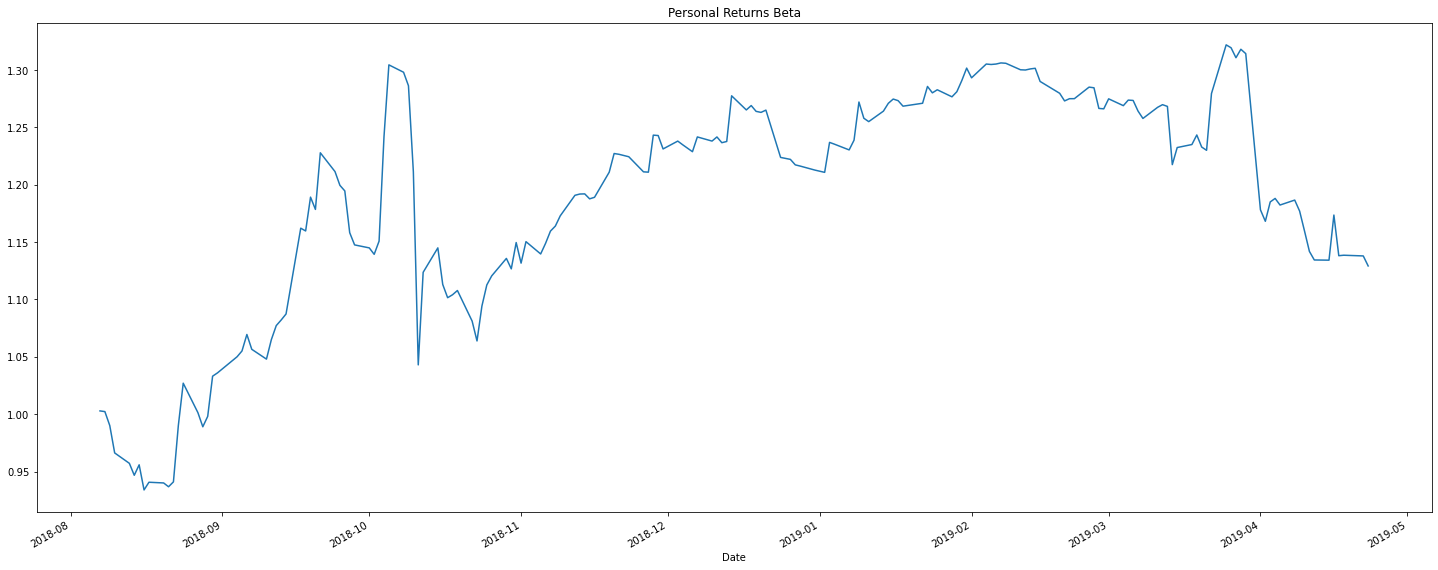

In [48]:
# Calculate and plot Beta
personal_cov = combined_portfolio["Personal Returns"].rolling(window=60).cov(combined_portfolio["S&P 500"])
beta = (personal_cov / sp500_var60)
beta.plot(figsize=(25,10), title="Personal Returns Beta")

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [49]:
# Calculate Annualzied Sharpe Ratios
combined_sharpe_ratios = (combined_portfolio.mean() * 252) / (combined_portfolio.std() * np.sqrt(252))
combined_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
Algo 1                         2.035665
Algo 2                         0.080607
S&P 500                        0.584820
Personal Returns               0.933123
dtype: float64

<AxesSubplot:title={'center':'Combined Sharpe Ratios'}>

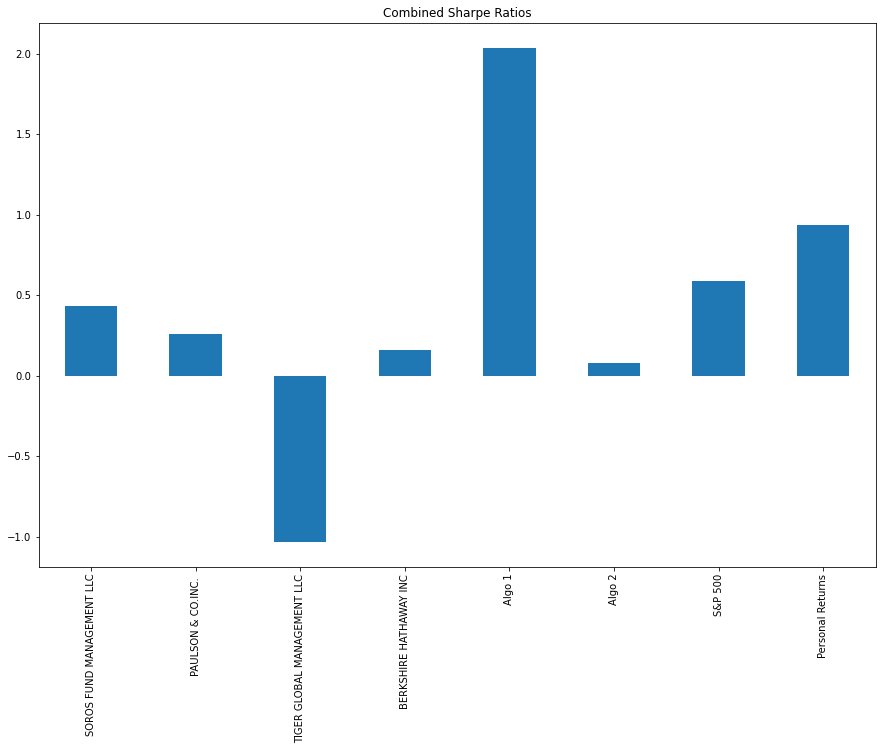

In [50]:
# Visualize the sharpe ratios as a bar plot
combined_sharpe_ratios.plot(figsize=(15,10), kind="bar", title="Combined Sharpe Ratios")

In [51]:
#Find the cumulative total return on the last date available
cumulative_returns = (1+ combined_portfolio).cumprod(axis=0)

cumulative_returns.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Personal Returns
Date,,,,,,,,
2019-04-16,1.047327,1.031664,0.777526,0.991310,1.287725,1.000274,1.065747,1.151031
2019-04-17,1.044293,1.024992,0.774097,0.994504,1.274460,0.995044,1.063324,1.161726
2019-04-18,1.045805,1.026245,0.774547,0.996409,1.273711,0.993821,1.065003,1.163521
2019-04-22,1.043101,1.018719,0.771728,0.995326,1.274573,0.991898,1.066081,1.164937
2019-04-23,1.050578,1.022269,0.776722,1.008541,1.280907,1.001441,1.075506,1.178868


In [52]:
#Print the cumulative total return on the last date available
total_returns = cumulative_returns.loc["2019-04-23",:]

print(total_returns)

SOROS FUND MANAGEMENT LLC      1.050578
PAULSON & CO.INC.              1.022269
TIGER GLOBAL MANAGEMENT LLC    0.776722
BERKSHIRE HATHAWAY INC         1.008541
Algo 1                         1.280907
Algo 2                         1.001441
S&P 500                        1.075506
Personal Returns               1.178868
Name: 2019-04-23 00:00:00, dtype: float64


### How does your portfolio do?

#### My portfolio is outperforms all of the portfolios except for Algo 1. Additonally, as evidenced in the sharpe ratio bar graph above, it provided the second most return for the risk it presented. As such, Algo 1 would still be the preferred portfolio.